In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict
from IPython.display import display, HTML
from scipy.stats import hypergeom
from pylab import rcParams
import os
import glob
from scipy.stats import ttest_ind
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import normalize
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import math
from matplotlib.colors import LogNorm

In [25]:
#Data preprocessing
folder = "data_expand"
pathCTRL = glob.glob(os.path.join(folder, "*CTRL*"))
pathPD = glob.glob(os.path.join(folder, "*PD*"))

def read_data(path):
    df_first = pd.read_csv(path[0], sep = "\t")
    df = pd.DataFrame(df_first["RPKM"]).T
    df.columns = df_first["Gene_Symbol"]
    df.index = [path[0]]
    
    for i in range(1, len(path)):
        data = pd.read_csv(path[i], sep = "\t")
        rpkm = pd.DataFrame(data["RPKM"]).T
        rpkm.columns = df_first["Gene_Symbol"]
        rpkm.index = [path[i]]
        df = df.append(rpkm)
        
    return df

dfCTRL_raw = read_data(pathCTRL)
dfCTRL_raw = dfCTRL_raw.loc[:,~dfCTRL_raw.columns.duplicated()]
dfPD_raw = read_data(pathPD)
dfPD_raw = dfPD_raw.loc[:,~dfPD_raw.columns.duplicated()]
gene_names_raw = dfCTRL_raw.columns
dfPD_raw = dfPD_raw.drop(["47.11"], axis = 1)
dfCTRL_raw = dfCTRL_raw.drop(["47.11"], axis = 1)
dfPD_raw

Gene_Symbol,SEPT1,SEPT2,SEPT3,SEPT4,SEPT5,SEPT6,SEPT7,SEPT8,SEPT9,SEPT10,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
data_expand/GSM3014978_Tissue_PD7.txt,0.43865,7.00563,111.35802,19.86348,183.77884,6.81742,15.94402,26.40958,56.32654,1.63320,...,1.49765,0.31335,1.72833,3.19654,3.01113,0.00000,13.11115,10.89987,5.86444,2.14022
data_expand/GSM3014977_Tissue_PD6.txt,0.47832,8.80831,113.60220,7.85844,213.43886,4.54657,14.06000,22.71885,48.13116,1.64392,...,1.42393,0.25806,2.08665,3.84347,3.54910,0.00000,11.59415,11.44431,6.65056,2.05823
data_expand/GSM3014976_Tissue_PD5.txt,0.39355,8.43742,104.34542,16.32693,156.15567,5.64802,13.88376,23.34562,60.28115,1.69071,...,0.93094,0.57965,1.93327,2.86079,3.68917,0.00000,10.75031,12.56459,6.64759,2.44737
data_expand/GSM3014972_Tissue_PD1.txt,0.85004,8.58055,92.17522,12.41373,212.93575,6.14646,11.89313,24.04431,55.32007,1.74475,...,0.98566,1.11786,1.99478,2.71992,3.79775,0.00000,8.73234,13.59602,7.25737,2.00129
data_expand/GSM3014974_Tissue_PD3.txt,0.55305,10.08789,93.65866,11.21986,136.40479,5.09709,15.76046,19.28194,60.65788,2.10347,...,1.11584,0.60770,2.53797,3.27631,3.60076,0.00662,10.50478,18.18748,6.24933,2.28925
data_expand/GSM3014975_Tissue_PD4.txt,0.35101,6.86576,117.77967,9.37787,174.42136,5.25818,13.29946,25.20505,53.19409,1.82728,...,0.77213,0.43445,2.56803,2.96933,3.70729,0.01855,12.66732,7.82868,6.37906,2.19002
data_expand/GSM3014973_Tissue_PD2.txt,0.62665,7.61188,96.45425,21.76822,184.59637,6.12232,11.81524,27.99758,41.69527,1.68054,...,0.82572,0.83242,2.56976,2.85315,3.99335,0.00000,8.93716,16.47454,7.97357,2.32685
data_expand/GSM3014979_Tissue_PD8.txt,1.06396,15.26071,99.07896,11.76152,175.36169,3.90978,12.80829,18.87492,53.79146,2.38891,...,0.55867,0.72159,3.27409,2.99468,4.28419,0.05410,7.24106,14.07481,6.37525,2.11468


In [26]:
(tscore, pval) = ttest_ind(dfPD_raw, dfCTRL_raw, axis = 0)
avg_pd = np.mean(dfPD_raw, axis = 0)
avg_ctrl = np.mean(dfCTRL_raw, axis = 0)
logfoldchange = np.log2((avg_pd - avg_ctrl) / avg_ctrl)
logfoldchange = np.nan_to_num(logfoldchange)
outputdf = np.vstack((pval, logfoldchange))
outputdf.shape
np.savetxt( "volcano.csv", outputdf, delimiter=',', header='pval,log')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log2
  after removing the cwd from sys.path.


[0.98828876 0.12994803 0.06782125 0.71100014 0.86523359 0.60611691
 0.19463844 0.53474979 0.06390847 0.03762917 0.57830796 0.63925344
 0.73760164 0.53524557 0.19288746 0.23440714 0.06481903 0.11275677
 0.67465869 0.18894292]


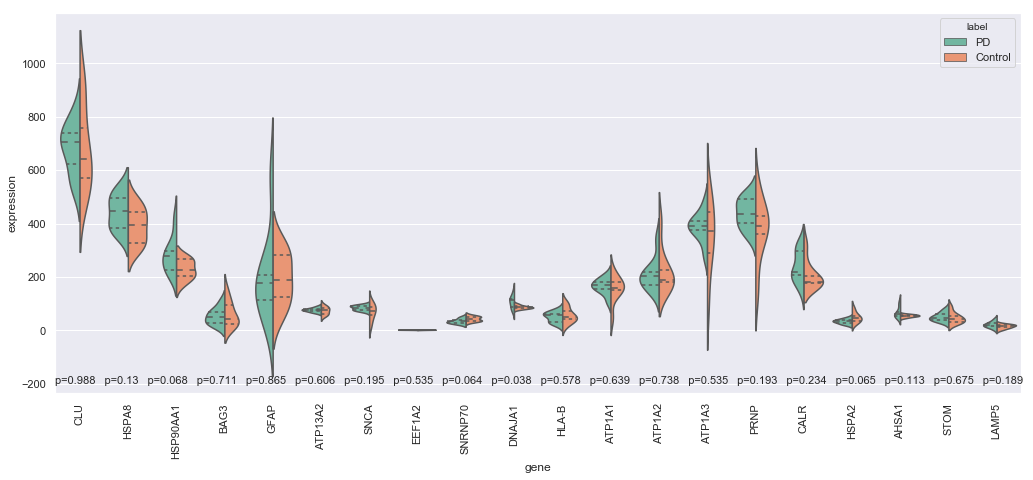

In [27]:
#Violin plot, Plot the genes of interest
gois = ["CLU", "HSPA8", "HSP90AA1", "BAG3", "GFAP", "ATP13A2", "SNCA", "EEF1A2", "SNRNP70", "DNAJA1", 
       "HLA-B", "ATP1A1", "ATP1A2", "ATP1A3", "PRNP", "CALR", "HSPA2", "AHSA1", "STOM", "LAMP5"]

(tscore, pval) = ttest_ind(dfPD_raw[gois], dfCTRL_raw[gois], axis = 0)
print(pval)
pvals = ["p=" + str(round(i, 3)) for i in pval]
pval_text = "   ".join(pvals)
violin_df = dfPD_raw[gois]
violin_df = violin_df.append(dfCTRL_raw[gois])
violin_df["label"] = ["PD"] * 8 + ["Control"] * 8
violin_df2 = pd.DataFrame(columns = ["gene", "expression","label"])
for i in range(16):
    for j in range(len(gois)):
        tempframe = pd.DataFrame([[gois[j], violin_df[gois[j]][i], violin_df["label"][i]]], columns = ["gene", "expression","label"])
        violin_df2 = violin_df2.append(tempframe)
violin_df2
sns.set(rc={'figure.figsize':(17.3,7)})
ax = sns.violinplot(x="gene", y="expression", hue = "label", data=violin_df2, split = True, 
                    palette="Set2", inner="quartile")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.text(x=-0.5, y=-200, s = pval_text, fontsize=11)
plt.show()

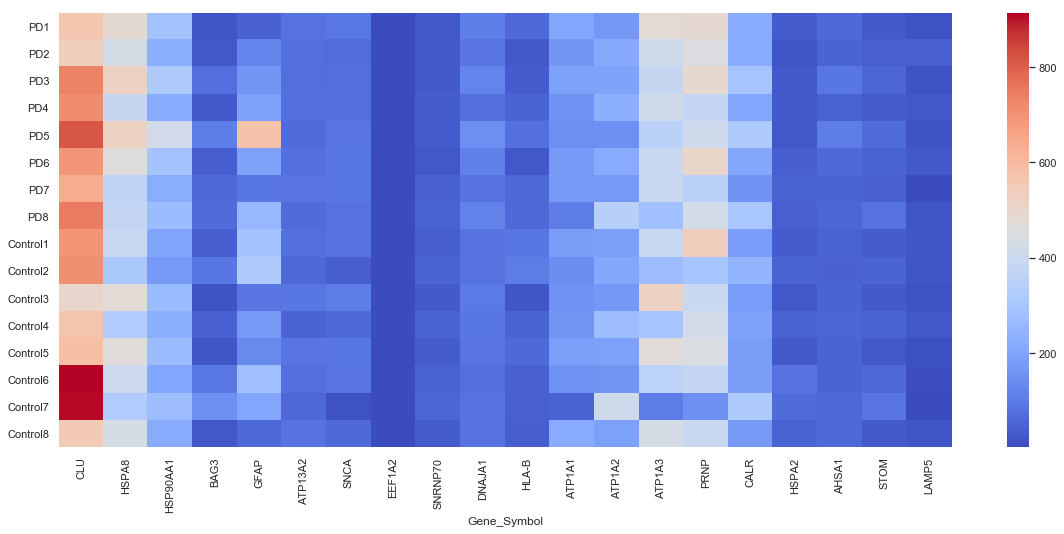

In [40]:
#Heatmap
sns.set(rc={'figure.figsize':(20,8)})
heatmap_df_goi = dfPD_raw.append(dfCTRL_raw)
heatmap_df_goi.index = ["PD" + str(i) for i in range(1,9)] + ["Control" + str(i) for i in range(1,9)]
heatmap_df_goi = heatmap_df_goi[gois]
sns.heatmap(heatmap_df_goi, fmt="g", cmap='coolwarm')

In [28]:
# Filter by variance
np_pd = dfPD_raw.to_numpy()
vt = VarianceThreshold() #create a variance threshold obj
vt.fit(np_pd)
var_pd = vt.variances_
var_pd_id = [int(x) for x in var_pd > 1]
pd_feature_idx = np.nonzero(var_pd_id)[0]
num_genes_filtered = len(pd_feature_idx)

gene_names_filtered = [gene_names_raw[i] for i in pd_feature_idx]
dfPD_filtered = dfPD_raw[gene_names_filtered]
dfCTRL_filtered = dfCTRL_raw[gene_names_filtered]
dfPD_filtered

Gene_Symbol,SEPT1,SEPT2,SEPT3,SEPT4,SEPT6,SEPT7,SEPT8,183ActI,5-HT5B,A1BG,...,ZNF84,ZNF90,ZNF91,ZPLD1,ZPR1,ZRANB3,ZSWIM6,ZSWIM7,ZYG11A,ZYG11B
data_expand/GSM3014978_Tissue_PD7.txt,0.43865,7.00563,111.35802,19.86348,6.81742,15.94402,26.40958,0.0,0.00000,1.77661,...,4.58090,0.52778,18.52157,0.00000,19.65215,1.16601,7.07597,6.61278,0.00000,13.11115
data_expand/GSM3014977_Tissue_PD6.txt,0.47832,8.80831,113.60220,7.85844,4.54657,14.06000,22.71885,0.0,0.00000,2.11239,...,4.68666,0.61037,17.73940,0.00000,15.59982,1.54889,8.54965,6.82123,0.00000,11.59415
data_expand/GSM3014976_Tissue_PD5.txt,0.39355,8.43742,104.34542,16.32693,5.64802,13.88376,23.34562,0.0,0.00000,2.38853,...,4.83903,0.45699,15.26731,0.01412,15.92118,1.27466,8.42316,4.90292,0.00000,10.75031
data_expand/GSM3014972_Tissue_PD1.txt,0.85004,8.58055,92.17522,12.41373,6.14646,11.89313,24.04431,0.0,0.00000,2.67894,...,4.04527,0.48962,12.12267,0.00000,14.48674,1.16237,7.43923,5.71988,0.00000,8.73234
data_expand/GSM3014974_Tissue_PD3.txt,0.55305,10.08789,93.65866,11.21986,5.09709,15.76046,19.28194,0.0,0.00000,2.14194,...,6.05009,0.63201,41.29374,0.01323,14.93553,1.07543,7.15179,4.19230,0.00662,10.50478
data_expand/GSM3014975_Tissue_PD4.txt,0.35101,6.86576,117.77967,9.37787,5.25818,13.29946,25.20505,0.0,0.00000,1.69344,...,4.89152,0.41388,15.29115,0.00000,16.59546,1.08292,7.26234,5.27393,0.01855,12.66732
data_expand/GSM3014973_Tissue_PD2.txt,0.62665,7.61188,96.45425,21.76822,6.12232,11.81524,27.99758,0.0,0.00000,2.55680,...,5.38827,0.28876,14.72021,0.00000,14.98292,1.49394,8.56918,7.72934,0.00000,8.93716
data_expand/GSM3014979_Tissue_PD8.txt,1.06396,15.26071,99.07896,11.76152,3.90978,12.80829,18.87492,0.0,0.01853,3.09397,...,6.22018,0.54115,28.64290,0.00000,10.58191,1.24683,9.96033,5.64038,0.05410,7.24106


In [29]:
#T-test
p_values_temp = []
gene_names_temp = []

for i in range(num_genes_filtered):
    (tscore, pval) = ttest_ind(dfPD_filtered[gene_names_filtered[i]], dfCTRL_filtered[gene_names_filtered[i]])
    if pval != None and pval < 0.05:
        p_values_temp.append(pval)
        gene_names_temp.append(gene_names_filtered[i])

num_genes_sig = len(p_values_temp)
p_values_argsort = np.argsort(p_values_temp)
print(p_values_argsort)
p_values, gene_names = [0] * num_genes_sig, [0] * num_genes_sig
for i in range(len(p_values_argsort)):
    order = p_values_argsort[i]
    p_values[i] = p_values_temp[order]
    gene_names[i] = gene_names_temp[order]

#print(p_values, gene_names, len(p_values))
dfPD_sig = dfPD_filtered[gene_names]
dfCTRL_sig = dfCTRL_filtered[gene_names]
dfPD_sig

[ 82 140  17 230  51  84  59 217  60 158 386 185 218 109 279 317 270 373
 256 211 239  63   5 396 224 201 100 287 204 162 274 315 304 261 206 251
  74 361  99 202 259 334 101 240 220 111 177 247 161  12  20  46 326 124
 288 323  24  89 255  93 349 210  90   6 116 107  96 105  73  53  88 278
 249  81 311 186 381 114  61 245  72 389 200 343 199 155 237 376 383 108
 400 291 241 150  70 362  27 364 337 356 157 369 234 347  42 142  54 359
  67  22   8 264 370 112 320 179 166 393 283 391  77 332 118 298 354 266
 382 360 184 380 316 367 147  29   7 346 402 302 273 195 310  80 231 173
 329  31 151 175 160 318  98 117 286 355 296 352 333 293 110 395 188 322
  85  38  32 137 238  48 312 378 306 191 339 358 299 269  28 351  44  50
 222 129 341 267 392 176 319 262 384 397  95 365 377 192 305 263 327  64
 353 159 336 104  21 363 290 141  30   0 250  10 275 178 131 223  52 253
   3 285 214   2 328  45 229 308  92 171 398 103  43 350 357  15 390 307
 271 128  69 252  39 193  14  71 342 375 324  49 28

Gene_Symbol,CRK,FA2H,ANKRD24,MATN1-AS1,CCDC27,CSNK1G1,CDH1,LMOD3,CDK15,GABRB1,...,MORC1,CAMK1G,ZNF707,dJ746H2.1,METTL8,TPCN2,APBB2,PTPN7,CYP8B1,YKT6
data_expand/GSM3014978_Tissue_PD7.txt,2.74109,2.28602,6.57124,0.03203,0.00000,1.60774,0.58031,0.19222,0.00000,15.32198,...,0.01659,42.63795,0.15948,4.85611,0.42994,2.77843,10.07507,0.02320,0.000,9.28187
data_expand/GSM3014977_Tissue_PD6.txt,2.68758,0.92452,7.44116,0.00000,0.00000,1.66642,0.28347,0.14511,0.00000,18.09760,...,0.00000,35.02695,0.10835,2.67518,0.43276,3.64918,9.44785,0.06569,0.000,9.65985
data_expand/GSM3014976_Tissue_PD5.txt,2.86654,1.92122,8.32538,0.00000,0.00000,1.70231,0.31974,0.09313,0.00000,18.72659,...,0.04822,37.70447,0.11332,3.17931,0.40998,3.58291,10.34757,0.03373,0.000,8.91792
data_expand/GSM3014972_Tissue_PD1.txt,2.28344,1.22050,7.31185,0.02328,0.00000,1.83731,0.49613,0.16297,0.01572,17.88076,...,0.12055,32.72292,0.12362,3.43354,0.37691,3.97810,10.41714,0.00000,0.000,6.73372
data_expand/GSM3014974_Tissue_PD3.txt,2.60208,1.00583,5.93953,0.00727,0.00000,1.67720,0.34086,0.16722,0.00000,20.40376,...,0.03765,31.49260,0.14477,2.62111,0.45533,3.34728,7.60781,0.06846,0.007,8.58211
data_expand/GSM3014975_Tissue_PD4.txt,2.91015,0.88939,4.54392,0.00000,0.00000,1.94443,0.30368,0.08143,0.00000,19.32354,...,0.14758,39.77959,0.18917,3.16924,0.60713,1.69337,9.29263,0.00000,0.000,10.06576
data_expand/GSM3014973_Tissue_PD2.txt,2.91088,1.96311,8.95267,0.05616,0.03455,1.68977,0.59849,0.14978,0.02528,14.91896,...,0.03878,31.20883,0.19883,3.22155,0.39884,4.30997,11.80124,0.14917,0.000,7.64743
data_expand/GSM3014979_Tissue_PD8.txt,2.20984,1.41236,8.35552,0.00000,0.03652,1.77834,0.48507,0.08907,0.02004,20.44617,...,0.03075,30.80441,0.14451,4.45981,0.49331,4.95833,8.09370,0.03584,0.000,7.33989


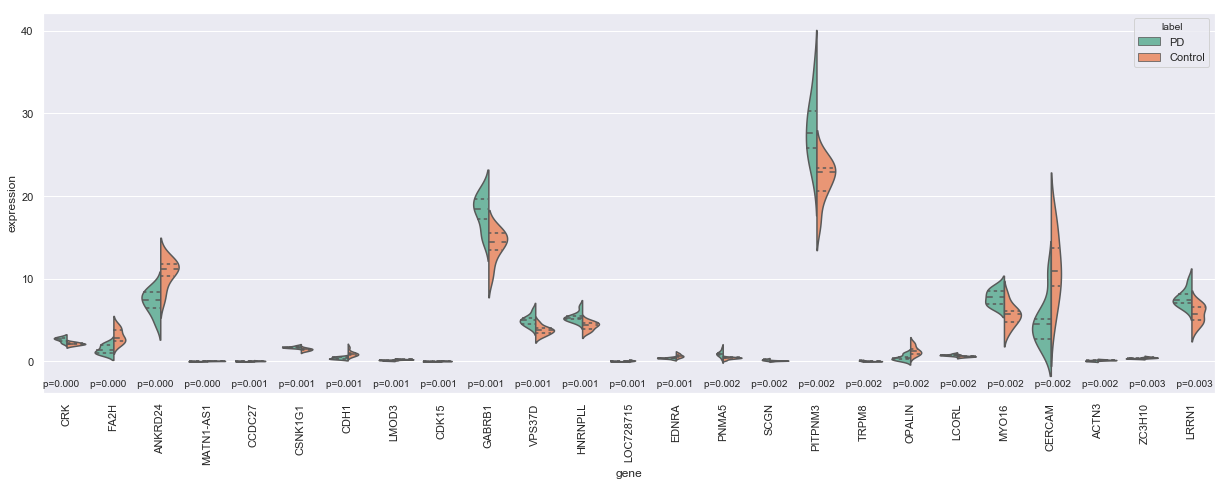

In [37]:
#Violin plot, Plot the most different ones
top_num = 25

violin_df = dfPD_sig[gene_names[:top_num]]
violin_df = violin_df.append(dfCTRL_sig[gene_names[:top_num]])
violin_df["label"] = ["PD"] * 8 + ["Control"] * 8
violin_df2 = pd.DataFrame(columns = ["gene", "expression","label"])
for i in range(16):
    for j in range(top_num):
        tempframe = pd.DataFrame([[gene_names[j], violin_df[gene_names[j]][i], violin_df["label"][i]]], columns = ["gene", "expression","label"])
        violin_df2 = violin_df2.append(tempframe)
sns.set(rc={'figure.figsize':(21,7)})
ax = sns.violinplot(x="gene", y="expression", hue = "label", data=violin_df2, split = True, 
                    palette="Set2", inner="quartile")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
tops = np.sort(p_values_temp)
pvals = ["p=" + str(format(i, '.3f')) for i in tops[:top_num]]
pval_text = "    ".join(pvals)
ax.text(x=-0.5, y=-3, s = pval_text, fontsize=10)
plt.show()

Explained variation per principal component: [0.68423538 0.14348041]


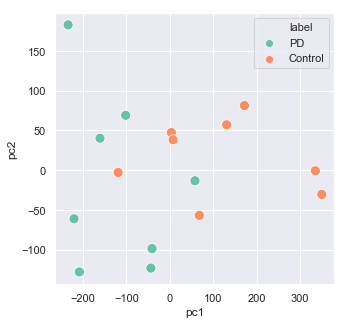

In [194]:
#PCA
dim_df = dfPD_sig.append(dfCTRL_sig)
dim_df["label"] = ["PD"] * 8 + ["Control"] * 8

pca = PCA(n_components=2)
pca_result = pca.fit_transform(dim_df[gene_names].values)
dim_df['pc1'] = pca_result[:,0]
dim_df['pc2'] = pca_result[:,1] 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_)) #from https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(
    x="pc1", y="pc2", hue="label", data=dim_df,
    palette=sns.color_palette("Set2", 2), legend="full", alpha=1, s = 100
)


[t-SNE] Computing 15 nearest neighbors...
[t-SNE] Indexed 16 samples in 0.000s...
[t-SNE] Computed neighbors for 16 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 16 / 16
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.172306
[t-SNE] KL divergence after 500 iterations: 0.354330


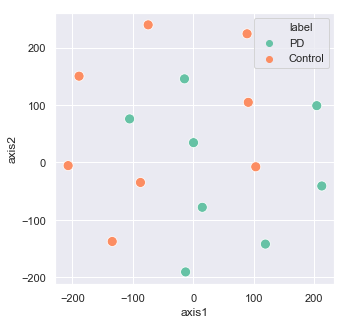

In [208]:
#T-SNE
dim_df2 = dfPD_sig.append(dfCTRL_sig)

tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=500)
tsne_results = tsne.fit_transform(dim_df2)
dim_df2["label"] = ["PD"] * 8 + ["Control"] * 8

dim_df2['axis1'] = tsne_results[:,0]
dim_df2['axis2'] = tsne_results[:,1]
plt.figure(figsize=(5,5))
sns.scatterplot(
    x="axis1", y="axis2", hue="label", data=dim_df2,
    legend="full", palette=sns.color_palette("Set2", 2), alpha=1.0, s = 100
)


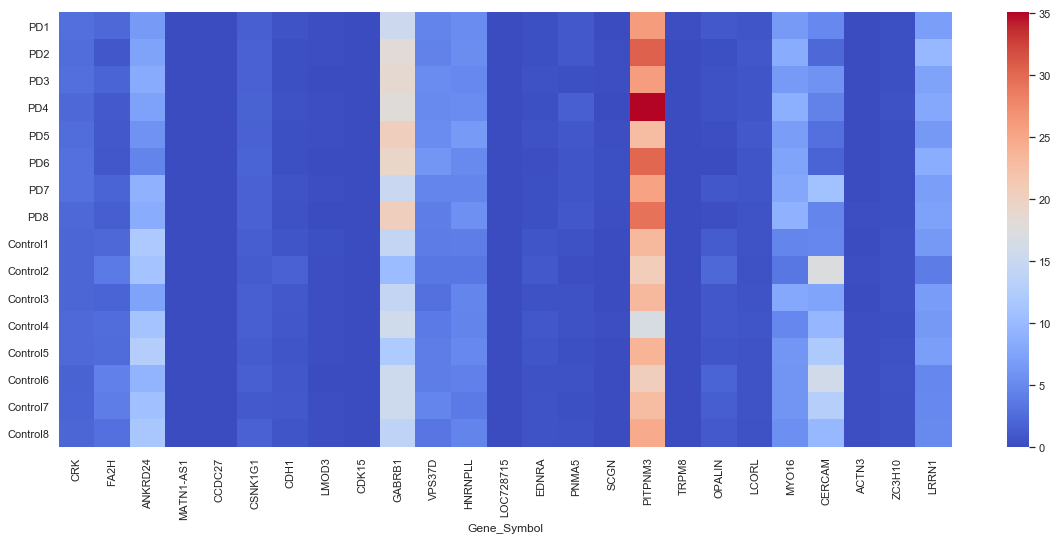

In [59]:
#Heatmap
sns.set(rc={'figure.figsize':(20,8)})
heatmap_df = dfPD_sig.append(dfCTRL_sig)
heatmap_df.index = ["PD" + str(i) for i in range(1,9)] + ["Control" + str(i) for i in range(1,9)]
heatmap_df = heatmap_df[gene_names[:25]]
#heatmap_df[gene_names[:25]] = np.sqrt(heatmap_df[gene_names[:25]])
sns.heatmap(heatmap_df, fmt="g", cmap='coolwarm')